In [135]:
import pandas  as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt


In [136]:
df = pd.read_csv("coupons.csv")

In [137]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [139]:
#Analyze values of a few selected columns
df['passanger'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

In [140]:
df['education'].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

In [141]:
df['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [142]:
df['maritalStatus'].value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

In [143]:
df['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [144]:
df['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [145]:
df['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [146]:
#Get a count of the total rows
df.shape

(12684, 26)

In [147]:
#Check for duplicates and drop them
df = df.drop_duplicates()

In [148]:
df.shape

(12610, 26)

In [149]:
#Check for null values 
df.isnull().sum(axis = 0)


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [150]:
# The 'car' column has nearly 99% of missing values, so we can drop this column
df.drop('car', axis=1, inplace=True)
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


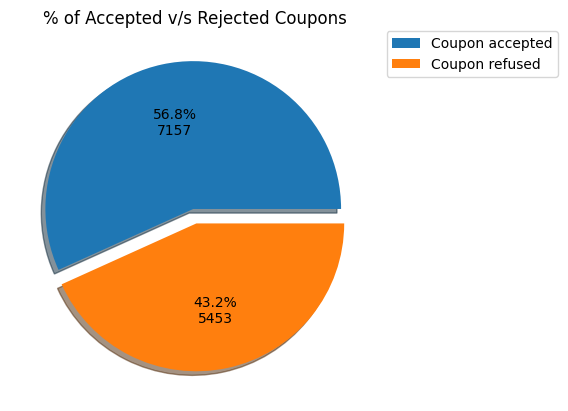

In [151]:
# Checking the coupon acceptance v/s rejection rate for the entire dataset
custom_labels = ["Coupon accepted","Coupon refused"]

def format(x):
    return '{:1.1f}%\n{:.0f}'.format(x,  (df['Y'].value_counts().values.sum())*x/100)

df.shape

data = df["Y"].value_counts()
ax = data.plot(kind="pie", autopct=format, shadow=True, explode=[0.05, 0.05], labels=custom_labels, legend=True, title='% of Accepted v/s Rejected Coupons',ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()


Text(0.5, 1.0, 'Responses based on weather')

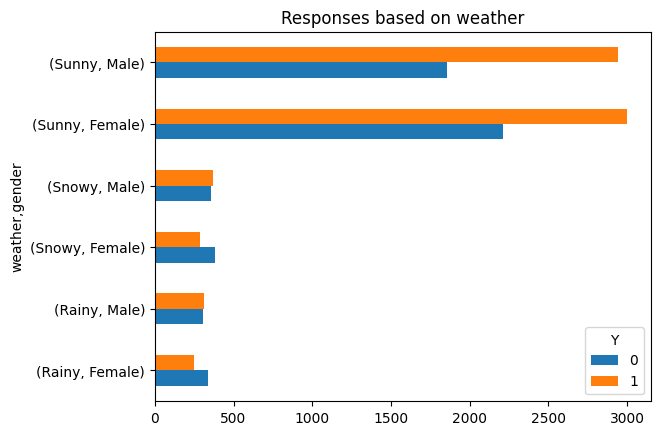

In [158]:
df.groupby(['weather','gender']).Y.value_counts().unstack().plot.barh()
plt.title("Responses based on weather")

Text(0.5, 1.0, 'Weather during coupon acceptance based on gender')

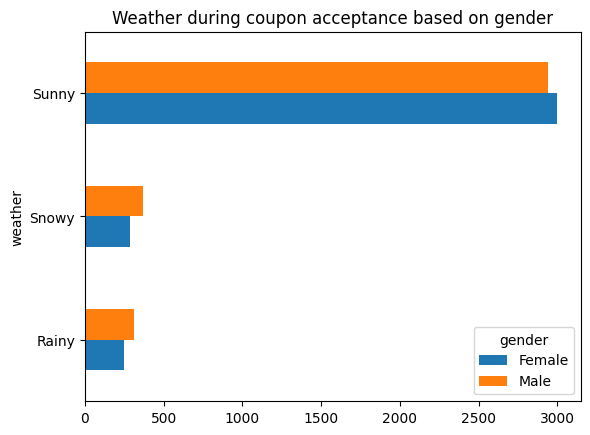

In [161]:
#Weather during coupon refusal based on gender
df.query('Y == 1').groupby('weather').gender.value_counts().unstack().plot.barh()
plt.title("Weather during coupon acceptance based on gender")


Text(0.5, 1.0, 'Weather during coupon refusal based on gender')

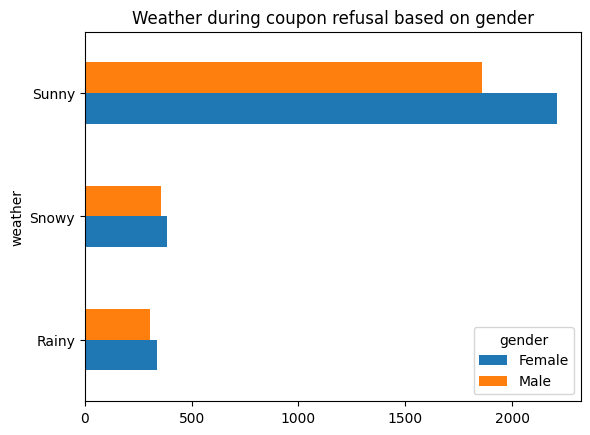

In [100]:
#Weather during coupon refusal based on gender
df.query('Y == 0').groupby('weather').gender.value_counts().unstack().plot.barh()
plt.title("Weather during coupon refusal based on gender")


In [101]:
#Analysis: Based on the above 3 charts, during sunny weather the driver whether male or female has a higher probability of accepting a coupon v/s when its snowy or rainy. 

Text(0.5, 1.0, 'Responses based on passanger')

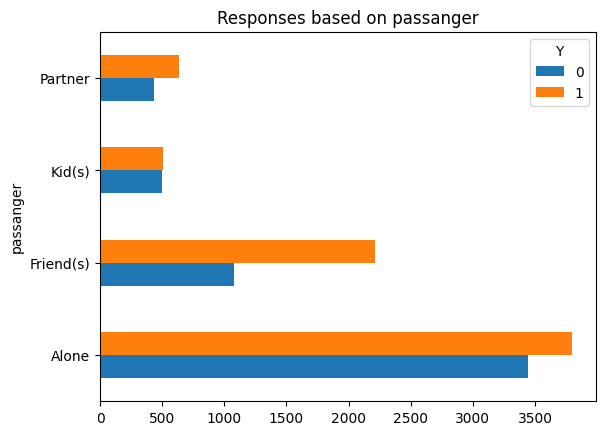

In [102]:
#Groupby passanger and analyze for values of Y
df.groupby('passanger').Y.value_counts().unstack().plot.barh()
plt.title("Responses based on passanger")


In [ ]:
#Analysis: Higher chances of accepting coupon if driver is alone based on above graph.

Text(0.5, 1.0, 'Responses based on direction_same')

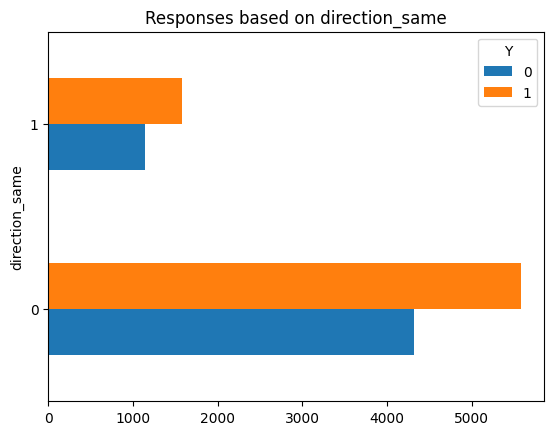

In [103]:
#Groupby direction_same and analyze for values of Y
df.groupby('direction_same').Y.value_counts().unstack().plot.barh()
plt.title("Responses based on direction_same")


In [ ]:
#Analysis: Higher chances of accepting coupon if driver is going in the same direction as coupon destination

Text(0.5, 1.0, 'Responses based on grouping of coupon & destination')

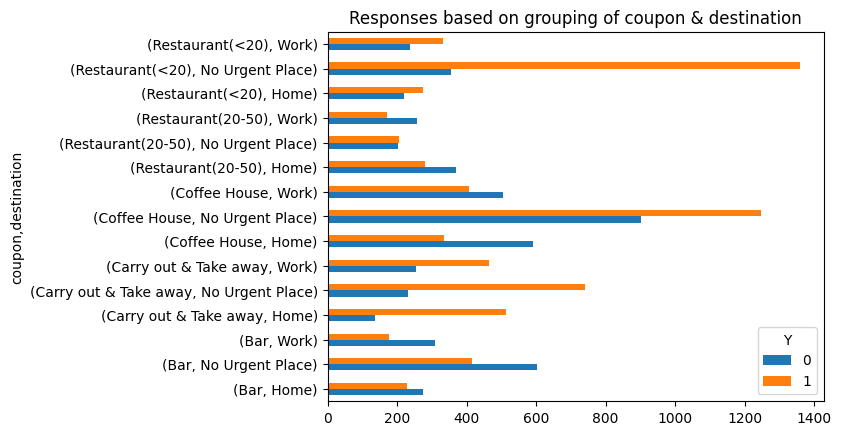

In [104]:
#Groupby coupon and then group by destinatin and analyze for values of Y
df.groupby(['coupon','destination']).Y.value_counts().unstack().plot.barh()
plt.title("Responses based on grouping of coupon & destination")


In [ ]:
    #Analysis: Higher probability of accepting a Coffee house coupon or a restaurant < 20 coupn if destination is 'No Urgent Place' 

Text(0.5, 1.0, 'Responses based on grouping of coupon & passanger')

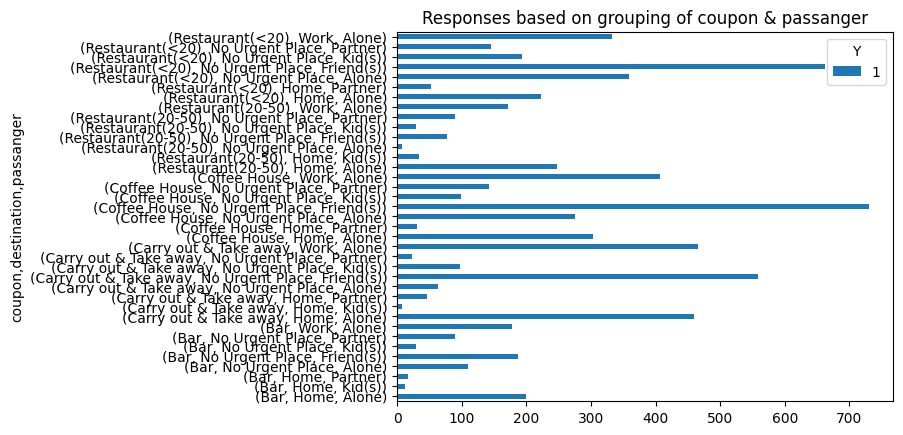

In [105]:
#Groupby coupon and then group by passanger and analyze for values of Y
df.query('Y==1').groupby(['coupon','destination','passanger']).Y.value_counts().unstack().plot.barh()
plt.title("Responses based on grouping of coupon & passanger")


In [ ]:
#Analysis: Higher probability of accepting a coupon if
#a) destination is 'No Urgent Place' and with Friends for a Coffee house coupon 
#b) destination is 'No Urgent Place' and with Friends for a restaurant < 20 coupon

Text(0.5, 1.0, 'Responses based on occupation')

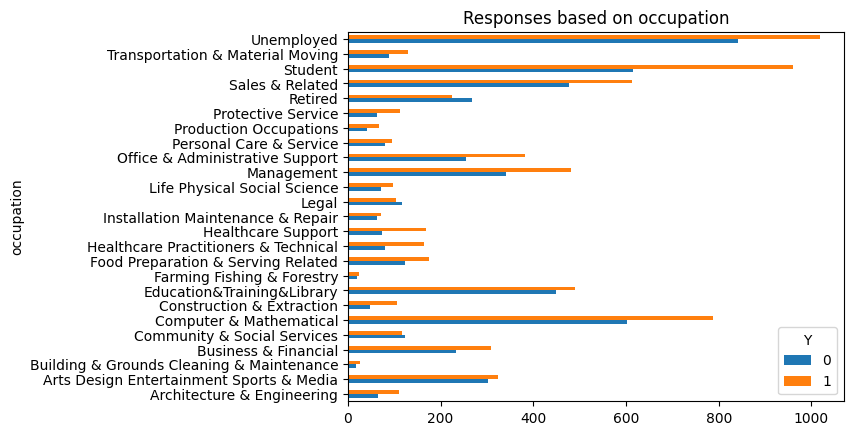

In [106]:
#Groupby occupation and analyze for values of Y
df.groupby('occupation').Y.value_counts().unstack().plot.barh()
plt.title("Responses based on occupation")


In [ ]:
#Analysis: Very low probability of accepting a coupon if occupation is 'Farming Fishing & Forestry" 

Text(0.5, 1.0, 'Age v/s Rejecting Coupon')

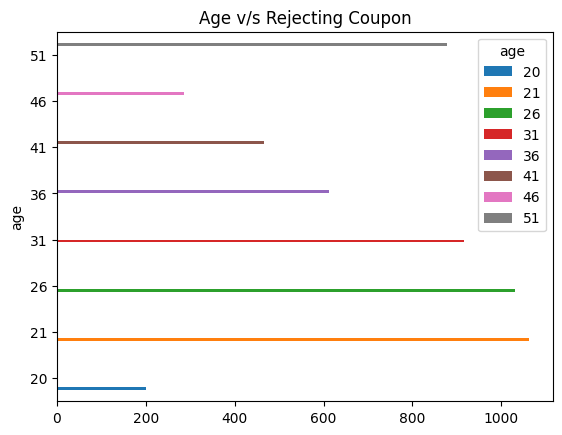

In [152]:
#Everyone with age = 50plus is assumed to be 51
#Everyone with age = below21 is assumed to be 20
df1 = df.query('Y==0')[['age','Y','passanger']]
df1["age"] = df["age"].str.replace("50plus","51")
df1["age"] = df1["age"].str.replace("below21","20")
df1["age"] = df1["age"].astype(int)

df1.query('Y == 0').groupby('age').age.value_counts().unstack().plot.barh()

plt.title("Age v/s Rejecting Coupon")


Text(0.5, 1.0, 'Age v/s Accepting Coupon')

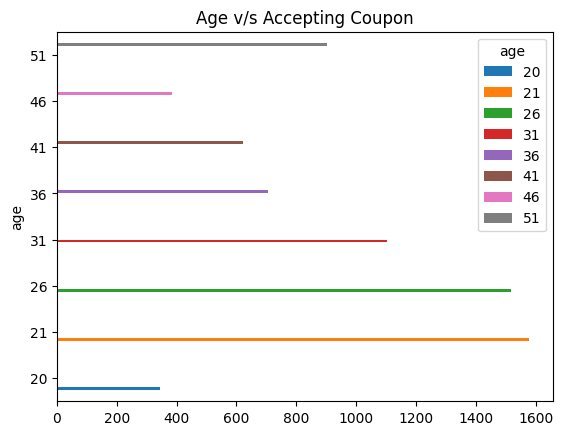

In [153]:

#Everyone with age = 50plus is assumed to be 51
#Everyone with age = below21 is assumed to be 20
df1 = df.query('Y==1')[['age','Y','passanger']]
df1["age"] = df["age"].str.replace("50plus","51")
df1["age"] = df1["age"].str.replace("below21","20")
df1["age"] = df1["age"].astype(int)

df1.query('Y == 1').groupby('age').age.value_counts().unstack().plot.barh()

plt.title("Age v/s Accepting Coupon")

In [47]:
#Analysis: Based on the above graph, 21 year old drivers have the highest coupon acceptance probablity

Text(0.5, 1.0, 'Passenger v/s weather when coupon rejected')

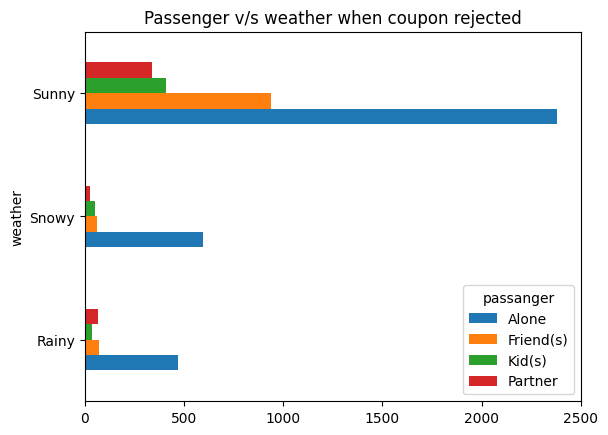

In [154]:
df1 = df.query('Y==0')[['gender','weather','age','Y','passanger']]
df1.query('Y == 0').groupby('weather').passanger.value_counts().unstack().plot.barh()
plt.title("Passenger v/s weather when coupon rejected")


In [49]:
#Analysis: If a driver was alone, they usually rejected the coupon irrespective of the weather. There might be another metric which influences
#this.


Text(0.5, 1.0, 'Passenger v/s weather when coupon accepted')

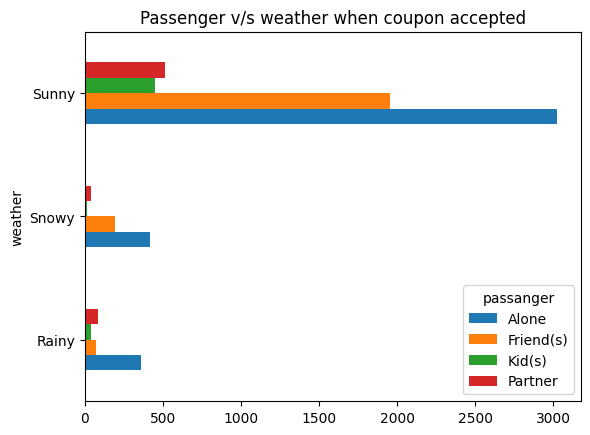

In [50]:
df1 = df.query('Y==1')[['gender','weather','age','Y','passanger']]
df1.query('Y == 1').groupby('weather').passanger.value_counts().unstack().plot.barh()
plt.title("Passenger v/s weather when coupon accepted")


Text(0.5, 1.0, 'Passenger v/s occupation when coupon accepted')

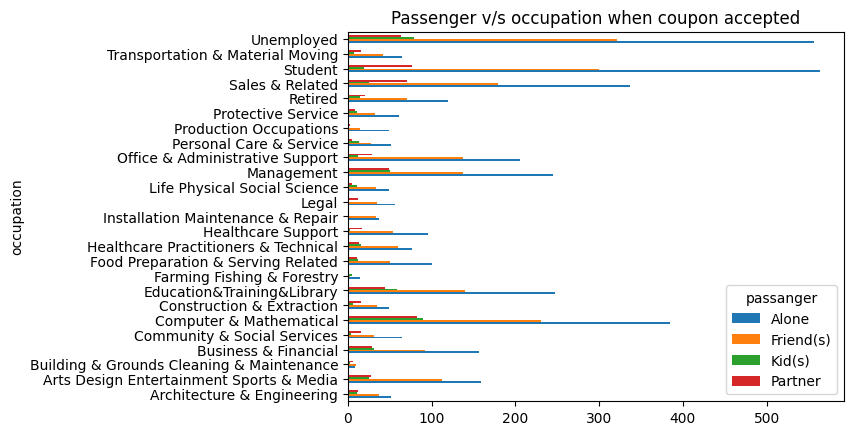

In [51]:
df1 = df.query('Y==1')[['gender','occupation','age','Y','passanger']]
df1.query('Y == 1').groupby('occupation').passanger.value_counts().unstack().plot.barh()
plt.title("Passenger v/s occupation when coupon accepted")

Text(0.5, 1.0, 'Passenger v/s occupation when coupon accepted')

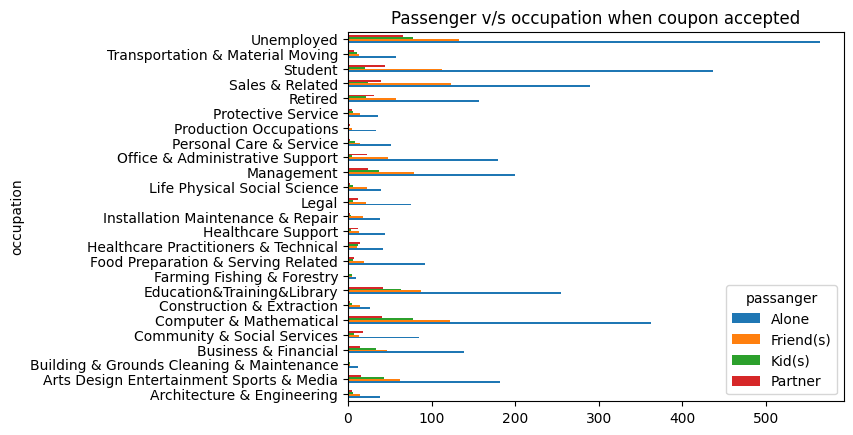

In [52]:
df1 = df.query('Y==0')[['gender','occupation','age','Y','passanger']]
df1.query('Y == 0').groupby('occupation').passanger.value_counts().unstack().plot.barh()
plt.title("Passenger v/s occupation when coupon accepted")


In [53]:
#Analysis: If driver is alone and occupation = Farming & fishing, they are least likely to accept a coupon.

Text(0.5, 1.0, 'Sunny weather grouped by CoffeeHouse for coupon Accepted v/s Rejected')

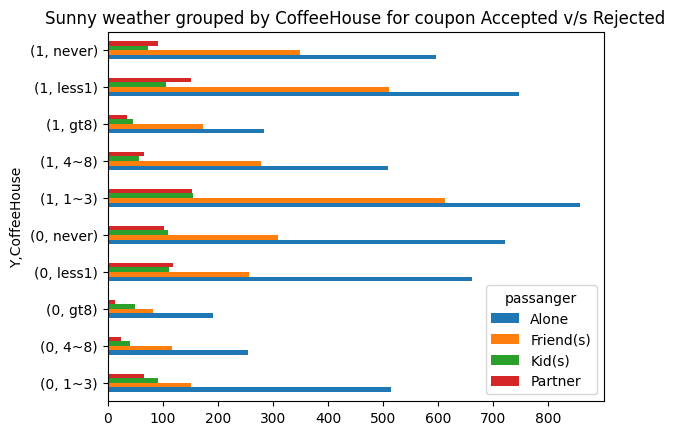

In [69]:
df.query('weather == "Sunny"').groupby(['Y','CoffeeHouse']).passanger.value_counts().unstack().plot.barh()
plt.title("Sunny weather grouped by CoffeeHouse for coupon Accepted v/s Rejected")

In [ ]:
#Analysis: Coupon accepted if Sunny weather and passenger alone and CoffeeHouse is between 1~3

Text(0.5, 1.0, 'Time for coupon acceptance v/s rejection')

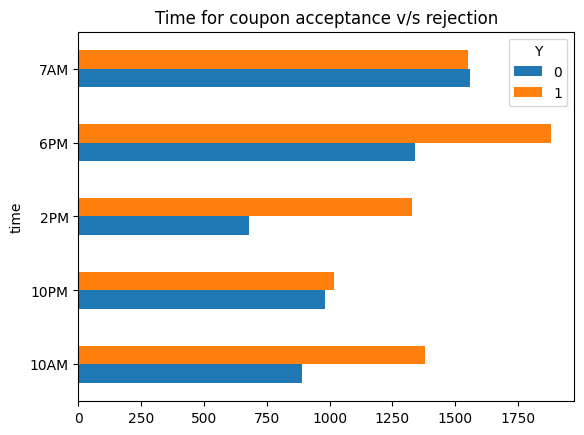

In [156]:
df.groupby('time').Y.value_counts().unstack().plot.barh()
plt.title("Time for coupon acceptance v/s rejection")

In [ ]:
#Analysis: At 6PM drivers usually accept coupons

Text(0.5, 1.0, 'Time for coupon acceptance v/s rejection')

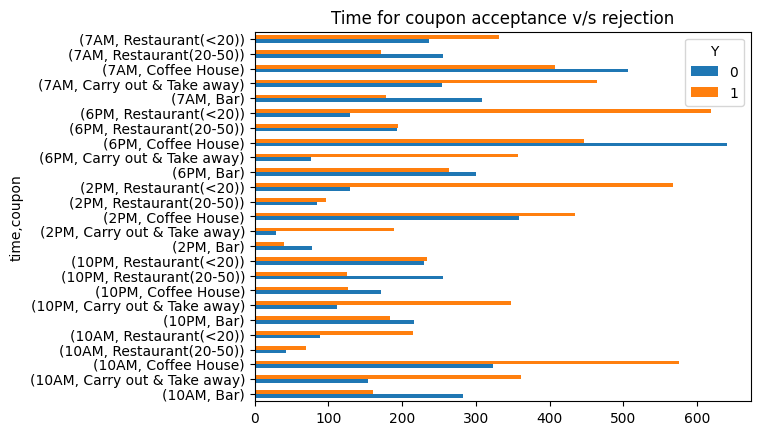

In [157]:
df.groupby(['time','coupon']).Y.value_counts().unstack().plot.barh()
plt.title("Time of day for coupon acceptance v/s rejection")

In [ ]:
#Analysis: At 2PM carryout and take away coupons are rejected and restaurant (20-50) coupons are
#rejected at 10 AM. At 6PM, restaurant<20 is accepted